# 지도 카테고리로 검색해보기

In [25]:
#1.웹에서 정적인 데이터를 가져오기 위한 라이브러리 import
import requests

#cf. curl -v -X GET "https://dapi.kakao.com/v2/local/search/category.json?category_group_code=SW8&rect=127.0561466,37.5058277,127.0602340,37.5142554" \
#-H "Authorization: KakaoAK kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk"

#2.다운로드 받을 url 만들기
addr = "https://dapi.kakao.com/v2/local/search/category.json?category_group_code=SW8"

#3.header 만들기
headers = {'Authorization':'KakaoAK e6901febcd85d42b531c1a5e6d70d9ee'}

#4.데이터 가져와서 일단 바로 출력해보기
resp = requests.get(addr,headers=headers)
text = resp.text
#print(text) #4-1. 결과를 보면 dict형태 JSON인걸 확인 가능하다.

#5.JSON 결과를 받았으니 json 파싱을 실시하기
# 5-1. json 파싱 내장 모듈 
import json

#5-2. json 파싱 
jsondata = json.loads(text) #java코드와 혼동하지 말 것
#print(type(jsondata)) #dict라는걸 알 수 있음

li = []
#5-3. KakaoAPI의 문서를 보고 필요한게 무엇인지 찾아온다 
# 확인결과 documents 키의 데이터를 가져오면 됨 
for imsi in jsondata['documents']: #jsondata의 리스트에서 document를 imsi dict로 인덱싱
    #print(imsi['place_name'],':', imsi['address_name']) #imsi dict에서 placename과 addressname을 뽑아서 리스트로 인덱싱
    d = {'역':imsi['place_name'],'주소':imsi['address_name']}
    #dict를 list에 추가하기
    li.append(d)
    
#출력해보기
for temp in li:
    print(temp)

    

{'역': '강남역 2호선', '주소': '서울 강남구 역삼동 804'}
{'역': '홍대입구역 2호선', '주소': '서울 마포구 동교동 192-5'}
{'역': '주안역 1호선', '주소': '인천 미추홀구 주안동 125'}
{'역': '합정역 2호선', '주소': '서울 마포구 합정동 420'}
{'역': '의정부역 1호선', '주소': '경기 의정부시 의정부동 168-54'}
{'역': '신촌역 2호선', '주소': '서울 서대문구 창천동 30-16'}
{'역': '당산역 2호선', '주소': '서울 영등포구 당산동6가 323-1'}
{'역': '혜화역 4호선', '주소': '서울 종로구 동숭동 67-2'}
{'역': '왕십리역 2호선', '주소': '서울 성동구 행당동 188-1'}
{'역': '종각역 1호선', '주소': '서울 종로구 관철동 291-2'}
{'역': '교대역 3호선', '주소': '서울 서초구 서초동 1748-19'}
{'역': '판교역 신분당선', '주소': '경기 성남시 분당구 백현동 산 4-14'}
{'역': '서울대입구역 2호선', '주소': '서울 관악구 봉천동 979-2'}
{'역': '명동역 4호선', '주소': '서울 중구 충무로2가 93-2'}
{'역': '잠실역 2호선', '주소': '서울 송파구 신천동 8'}


# 위키피디아에서 하이퍼링크 태그 내용 가져오기

In [41]:
#위키피디아에서 하이퍼 링크(a) 태그의 내용 가져오기
import requests as req

addr = "https://ko.wikipedia.org/wiki/%ED%86%A0%EC%84%B1" #1. 주소를 넣은 객체
resp = req.get(addr) #2.get으로 가져오기
#print(resp.text)  #데이터를 제대로 가져왔는지 확인하는 작업

#3. html 파싱을위한 뷰티플소프 라이브러리 가져오기
import bs4

#4.DOM객체로 만들기
bs = bs4.BeautifulSoup(resp.text, 'html.parser')
#print(type(bs))

#5.a태그의 내용만 가져와보기
li = bs.find_all('a') 
#print(li)
for temp in li: #5-1. print(temp)로 펼쳐놓고 a안의 무언가를 가져오고 싶다면 getText를 print의 매개변수로 넣어주면 된다.
    #print(temp)
    #print(temp.getText())
    #print(temp.attrs['href']) #5-2 왜 키 에러가 날까? href가 있는애도 있고 없는애도 있기 때문
    if 'href' in temp.attrs:
        print(temp.attrs['href']) #5-3. temp.attrs에 href 속성이 있다면, 출력해주세요!

print("")
        
#6. 정규식(문자열 패턴을 조회하기 위한 식 모듈) import
import re
for temp in li:
    if 'href' in temp.attrs:
        #6-1. href 속성에 /wiki/로 시작하는 링크의 텍스트와 링크만 가져오는 작업
        href = temp.attrs['href']
        #6-2. 정규식을 만들기
        p.re.compile('^(/wiki)') #이런 패턴을 매개변수로 넣으려면 정규식 패턴을 좀 공부하자!
        if p.search(href) != None:
            print(temp.getText(), ':', href)

#mw-head
#p-search
/wiki/%EC%9C%84%ED%82%A4%EB%B0%B1%EA%B3%BC:%EB%8F%99%EC%9D%8C%EC%9D%B4%EC%9D%98%EC%96%B4_%EB%AC%B8%EC%84%9C
/wiki/%ED%86%A0%EC%84%B1_(%EB%8F%99%EC%9D%8C%EC%9D%B4%EC%9D%98)
/wiki/%ED%8C%8C%EC%9D%BC:Saturn_symbol.svg
/wiki/%ED%8C%8C%EC%9D%BC:Saturn_during_Equinox.jpg
/wiki/%EC%B9%B4%EC%8B%9C%EB%8B%88_%ED%98%B8
/wiki/J2000
/wiki/%EB%B0%98%EC%A7%80%EB%A6%84
/wiki/%ED%82%AC%EB%A1%9C%EB%AF%B8%ED%84%B0
/wiki/%EC%B2%9C%EB%AC%B8_%EB%8B%A8%EC%9C%84
/wiki/%EB%91%98%EB%A0%88
/wiki/%ED%85%8C%EB%9D%BC_(SI_%EC%A0%91%EB%91%90%EC%96%B4)
/wiki/%EB%AF%B8%ED%84%B0
/wiki/%EC%9D%B4%EC%8B%AC%EB%A5%A0
/wiki/%EA%B7%BC%EC%9D%BC%EC%A0%90
/wiki/%EC%9B%90%EC%9D%BC%EC%A0%90
/wiki/%EA%B3%B5%EC%A0%84_%EC%A3%BC%EA%B8%B0
/wiki/%EC%9C%A8%EB%A6%AC%EC%9A%B0%EC%8A%A4%EB%85%84
/wiki/%EA%B3%B5%EC%A0%84_%EC%A3%BC%EA%B8%B0
/wiki/%EA%B6%A4%EB%8F%84_%EA%B2%BD%EC%82%AC
/wiki/%EC%8A%B9%EA%B5%90%EC%A0%90_%EA%B2%BD%EB%8F%84
/wiki/%EA%B7%BC%EC%9D%BC%EC%A0%90_%EC%9D%B8%EC%88%98
/wiki/%EC%9C%84%EC%84%B1
/wiki/%EC%A0%

NameError: name 'p' is not defined

# 네이버tv에서 상위 항목의 제목과 링크 가져오기

In [11]:
import bs4
import requests as req

addr = "https://tv.naver.com/" #addr과 resp 재정의하기 싫어서 그냥 다시 가져옴. >> 주소 네이버 tv걸로 바꿔주기
resp = req.get(addr)

bs = bs4.BeautifulSoup(resp.text,'html.parser')
tvlist= bs.select('dl > dt > a > tooltip')
#recommend_container > ul > li:nth-child(1) > dl > dt > a > tooltip 이게 full인데 전부 다 넣어주지않고 좀 줄여줘도 된다.
# ==> 적절한 범위를 조정

for temp in tvlist:
    print(temp.getText())

거북송 [깨비키즈 KEBIKIDS]
[고덕호의 골프 레슨]스윗스팟 찾아주는 A-B드..
어서와 바이올렛브라운은 처음이지?
핑크핑크한 머메이드 젤 네일아트 / Pink merma..
무릎통증 없이 쉽게 허벅지 슬리밍하는법! /스..
남자 때문에 인간관계 X됨 [엑스엑스(XX)] - 하..
이해찬 "무상 마스크 지급 대책 필요…신천지 시..
안성현 프로 골프레슨│롱퍼팅은 거리일까요 방..
모모랜드 바나나차차 🍌🍌🍌
박찬호, 억대 연봉 된 사나이 [전지훈련/스토브..
[MV] 지코(ZICO) _ 아무노래(Anysong)
나도 야구 팬이다! #2 연예계 소문난 롯데 골수..
[콩순이 쏭쏭쏭] 7. 박수송
[월드줌인] 남녀 200쌍의 '마스크 키스'…코로나..
뽀로로 바나나차차 율동버전 🍌🍌🍌
BTS (방탄소년단) 'ON' Kinetic Manifesto Film..
손 소독제 만들기 - 글리세린 대신 "이것"넣으..
한석규(Han Seok gyu), 의학드라마 홍수 속 '낭..
코다리조림 황금레시피 쉽게 만드는법
[블랙 위도우] 첫 번째 예고편 공개!
문 대통령 대구 방문…“사회·경제적 특단의 지원..
소불고기 황금레시피 쉬운 양념으로 뚝딱!
[현장영상] 권영진 "마스크 제때 공급 못 해 죄..
촉촉 쿠션 최강자! 매트 쿠션 최강자!! 일 년 ..
미스터트롯 임영웅 본선2차
[자막뉴스] ‘이런 증상’ 나타나면 외출자제…대..
"과천서 9300여명 예배"…경기도, 신천지 시설 ..
기구 필라테스 효과, 집에서 똑같이 볼 수 있는..
잘 생겨서 주목할 선수로 뽑힌 오선우 [전지훈..
적어도 난 진짜 연애중이야 #남사친이_불편해졌..
레드벨벳 웬디 ‘Power Up (파워업)’ 4k Real Fa..
[자막뉴스] 한국에 코로나19 '훈수' 두던 중국,..
리빙스크랩북 (1) 아일랜드 디자인 50가지 모음
7번째 사망자 발생·확진자 총 763명-2월 24일 ..
이강인 선수 챔스 D-1 훈련 중 쓰러져
[2020 잠실직캠] 두산 응원단&유리포터의 비글..
[요즘인기❤ 미스터

# 오늘 날씨를 가져와서 그래프 그리기

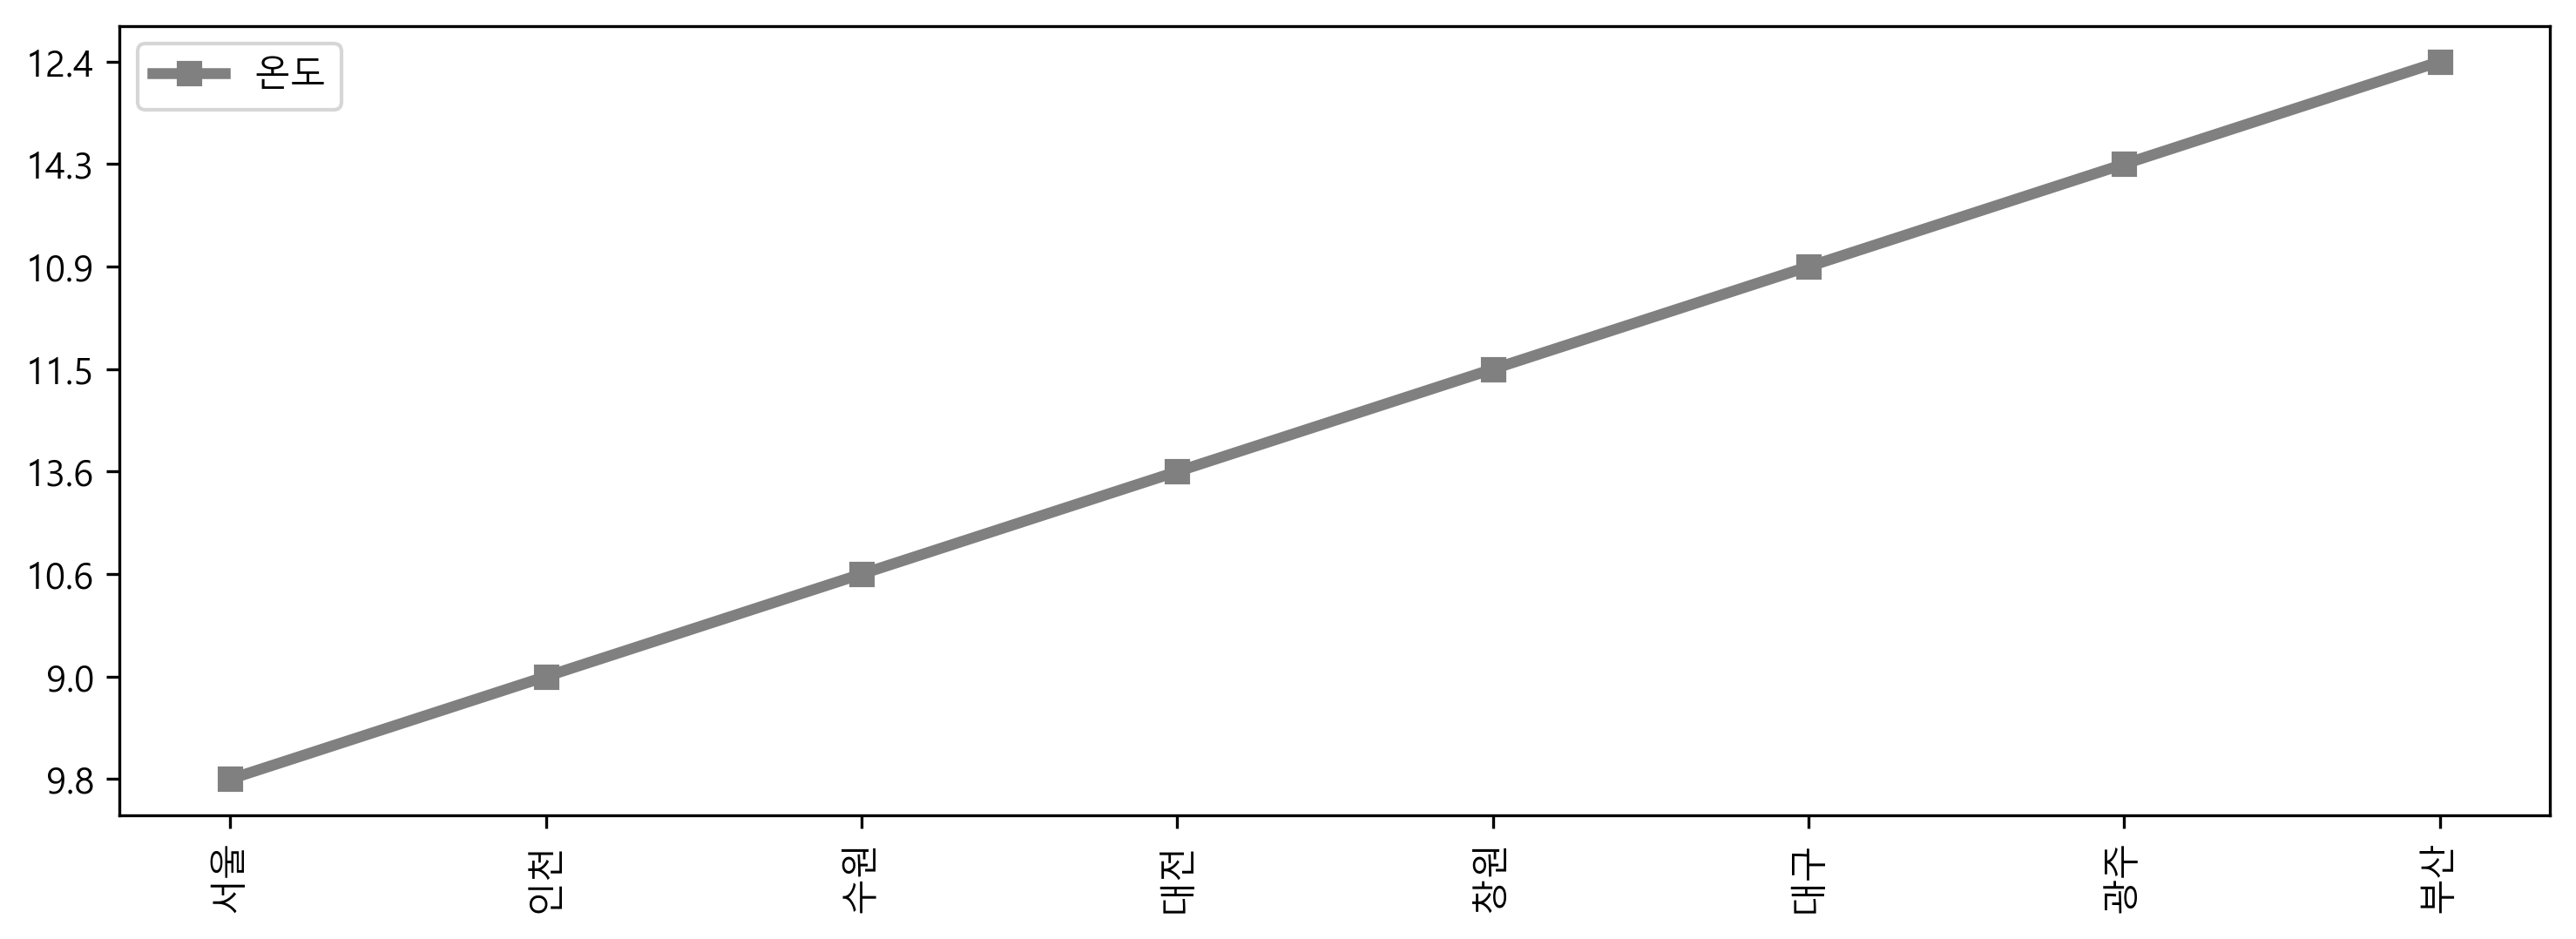

In [65]:
import requests
# 필요한 html 가져오기
resp = requests.get("https://www.weather.go.kr/weather/observation/currentweather.jsp") #1.get으로 주소 넣어주기
text = resp.text #2.text 메소드 호출
#print(text)

import bs4
bs = bs4.BeautifulSoup(resp.text, 'html.parser')
table = bs.select('.table_develop3') #3. 클래스 속성의 값이 table_develop3인 데이터를 찾아라
#print(table) #4. 제대로 가져오는지 확인하면 다시 닫아두기

#5. 도시이름, 온도, 습도를 저장할 리스트를 미리 만들어 두기
loc = []
temp = []
hum = []

#6. 가져온 테이블 중에서 첫번째 테이블로부터 줄(tr) 단위로 읽기
for tr in table[0].find_all('tr'):
    tds = tr.find_all('td') #6-1. tr태그에서 td가 있으면 모두 찾아서 객체 tds에 넣어라.
    for td in tds:
        if td.find('a'): #6-2 만약 a태그가 있다면 이 표에서는 도시 이름을 뜻하는 행
            #도시이름을 loc 리스트에 추가
            loc.append(td.find('a').text) #td에서 a를 찾고 텍스트로 loc에 append!
            
            #6-3 온도를 temp에 추가하기
            temp.append(tds[5].text)
            
            #6-4 습도를 hum에 
            hum.append(tds[10].text)
            
#7. 제대로 불러오고 있는지 데이터를 확인하기
#print(loc[0:5]) #0에서 4번까지 확인할래 : 슬라이싱 기법(범위를 가지고 추출)
#print(temp[0:5])
#print(hum[0:5])

#8.필요한 도시의 데이터만 추출
cities = ['서울', '인천', '수원', '대전', '창원', '대구', '광주', '부산']

#8-1. 이 도시들의 온도와 습도만 저장할 list를 따로 만들어준다.
temp2 = []
hum2 = []

#9. cities에 있는 데이터만 추출해서 저장하자
for city in cities:
    j = 0
    for c in loc:
        if c == city:
            temp2.append(temp[j])
            hum2.append(hum[j])
            break
        j = j + 1
        
#print(temp2) #데이터가 제대로 들어갔는지 확인해보는 것
#print(hum2)


#===================여긴 저장해두고 필요하면 그냥 갖다 붙이기 ===================#

#파이썬에서 시각화를 하는 기본 패키지
import matplotlib.pyplot as plt 
#한글 폰트 사용을 위한 패키지
from matplotlib import font_manager,rc, rcParams
import platform #운영체제 확인을 위한 패키지

#주피터 노트북에서 그래프를 셀 안에 출력해주는 설정
#%matplotlib inline #주피터 노트북에서 그래프가 클래스 이름으로 출력 - 한 번 더 실행해도 됨
#음수를 제대로 표현하기 위한 설정
rcParams['axes.unicode_minus'] = False #이 설정을 하지 않으면 음수가 네모로 출력
#한글 폰트 설정
if platform.system() == 'Windows': #윈도우즈라면
    font_name = font_manager.FontProperties(fname='c:/windows/Fonts/malgun.ttf').get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin': #매킨토시(MacOS)라면
    rc('font', family='AppleGothic')
else:
    print('알 수 없는 운영체제')
    
#================================================================================#   

#실제로 그래프 그리기
plt.figure(figsize=(12,4), dpi=300) #그래프 크기 설정 - 가로 12inch 세로 4인치
#꺽은선 그래프 - plot
plt.plot(temp2, label='온도', lw=3, color= 'grey', linestyle='-', marker='s')
#plt.plot(hum2, label='습도', lw=3, color='g', linestyle='-', marker='s')

#x 축
plt.xticks(range(0,len(cities),1), cities, rotation='vertical')
#범례
plt.legend()

#출력
plt.show()